In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
x = np.arange(0,10,1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
y = x*2+4
y

array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

<Axes: >

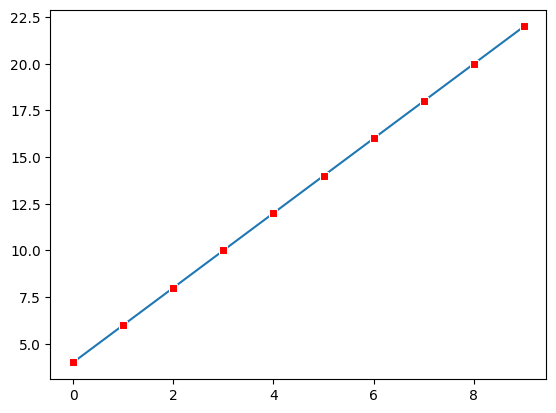

In [17]:
sns.lineplot(x=x,y=y, marker='s', markerfacecolor='red')

## Teste client config

In [18]:
import os
import pandas as pd

In [19]:
dirc = 'logs'
# dirc = 'logs-avg'

In [20]:
client_files = list(filter(lambda x: 'c-data' in x, os.listdir(f'{dirc}')))
client_files_1 = list(filter(lambda x: 'c-data' in x, os.listdir(f'{dirc}')))
client_files[1:]

['c-data-0.csv', 'c-data-2.csv', 'c-data-4.csv', 'c-data-1.csv']

In [21]:
df = pd.read_csv(f'{dirc}/{client_files[0]}')
for cf in client_files[1:]:
    df = pd.concat([df, pd.read_csv(f'{dirc}/{cf}')])

In [22]:
df.head()

,rounds,participating_state,desired_state,selected,cid,g_fit_acc,g_fit_loss,g_eval_acc,g_eval_loss,training_method,aggregation,selection,maxfl_threshold,qk
0,1,True,True,True,3,0.899004,3.337897,0.0860,90.273712,maxfl,maxfl-normal,random,0.793309,-2.000000
1,2,True,True,False,3,0.001718,128.584396,0.0860,90.273712,maxfl,maxfl-normal,random,0.793309,-2.000000
2,3,True,True,True,3,0.906905,2.256616,0.2585,42.776951,maxfl,maxfl-normal,random,0.793309,-2.000000
3,4,True,True,True,3,0.935211,0.620542,0.5110,19.851212,maxfl,maxfl-normal,random,0.793309,-2.000000
4,5,True,True,False,3,0.967709,0.171199,0.5110,19.851212,maxfl,maxfl-normal,random,0.793309,0.247234


In [23]:
import seaborn as sns

<Axes: xlabel='rounds', ylabel='g_eval_acc'>

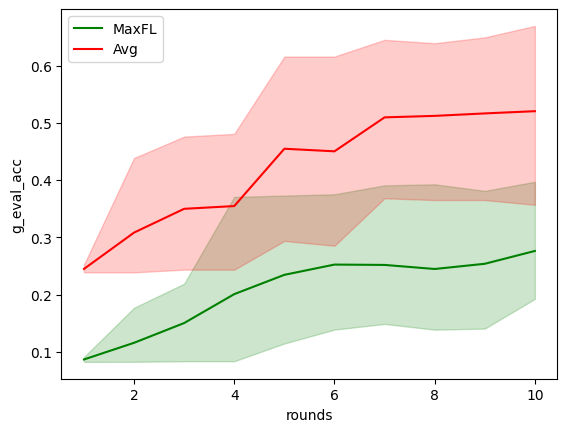

In [25]:
# ax=sns.lineplot(data=df, x='rounds', y='g_eval_loss', color='green', label='MaxFL')
ax=sns.lineplot(data=df.loc[df['training_method'] == 'maxfl'], x='rounds', y='g_eval_acc', color='green', label='MaxFL')
sns.lineplot(data=df.loc[df['training_method'] == 'avg'], x='rounds', y='g_eval_acc', ax=ax, color='red', label="Avg")
# sns.lineplot(data=df.loc[df['aggregation'] == 'avg'], x='rounds', y='g_eval_acc', ax=ax, color='blue', label="avg")

In [91]:
df = pd.read_csv(f'{dirc}/s-data.csv')

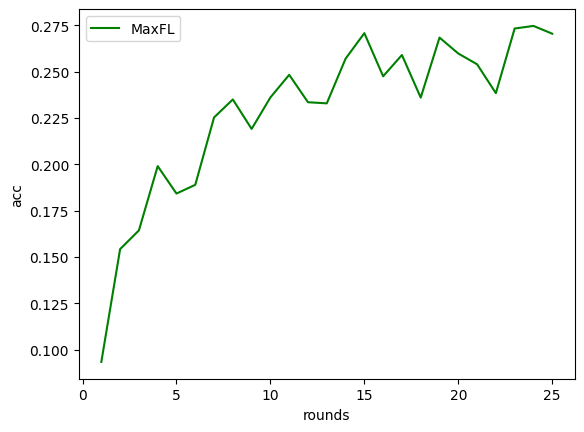

In [92]:
ax=sns.lineplot(data=df, x='rounds', y='acc', color='green', label='MaxFL')
